**Import các thư viện cần thiết**

In [ ]:


import numpy as np 
import pandas as pd
import os
import cv2

In [ ]:
pip install tensorflow==2.4.0

     |████████████████████████████████| 394.7 MB 18 kB/s 
     |████████████████████████████████| 3.8 MB 36.1 MB/s 
     |████████████████████████████████| 462 kB 46.6 MB/s 
     |████████████████████████████████| 2.9 MB 39.1 MB/s 
  Attempting uninstall: grpcio
    Found existing installation: grpcio 1.39.0
    Uninstalling grpcio-1.39.0:
      Successfully uninstalled grpcio-1.39.0
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.6.0
    Uninstalling tensorflow-estimator-2.6.0:
      Successfully uninstalled tensorflow-estimator-2.6.0
  Attempting uninstall: h5py
    Found existing installation: h5py 3.1.0
    Uninstalling h5py-3.1.0:
      Successfully uninstalled h5py-3.1.0
  Attempting uninstall: gast
    Found existing installation: gast 0.4.0
    Uninstalling gast-0.4.0:
      Successfully uninstalled gast-0.4.0
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.6.0
    Uninstalling tensorflow-2.6.

In [ ]:
pip install keras==2.4.2


     |████████████████████████████████| 170 kB 12.9 MB/s 
  Attempting uninstall: keras
    Found existing installation: keras 2.6.0
    Uninstalling keras-2.6.0:
      Successfully uninstalled keras-2.6.0


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **Load dataset**

In [ ]:
labels = os.listdir("/content/drive/MyDrive/input/train")
labels

['Closed', 'Open', 'yawn', 'no_yawn']

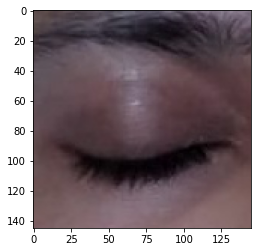

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(plt.imread("/content/drive/MyDrive/input/train/Closed/1.jpg"))

In [ ]:
a = plt.imread("/content/drive/MyDrive/input/train/yawn/102.jpg")
a.shape

(480, 640, 3)

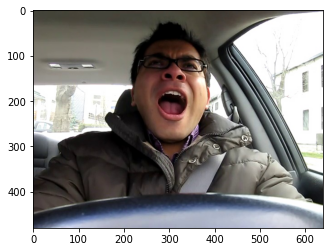

In [ ]:
plt.imshow(plt.imread("/content/drive/MyDrive/input/train/yawn/102.jpg"))

In [ ]:
def face_for_yawn(direc="/content/drive/MyDrive/input/train"):
    yaw_no = []
    IMG_SIZE = 224
    categories = ["yawn", "no_yawn"]
    for category in categories:
        path_link = os.path.join(direc, category)
        class_num1 = categories.index(category)
        print(class_num1)
        for image in os.listdir(path_link):
            image_array = cv2.imread(os.path.join(path_link, image), cv2.IMREAD_COLOR)
            resized_array = cv2.resize(image_array, (IMG_SIZE, IMG_SIZE))
            yaw_no.append([resized_array, class_num1])
    return yaw_no


yawn_no_yawn = face_for_yawn()

0
1


In [ ]:
def get_data(dir_path="/content/drive/MyDrive/input/train"):
    labels = ['Closed', 'Open']
    IMG_SIZE = 224
    data = []
    for label in labels:
        path = os.path.join(dir_path, label)
        class_num = labels.index(label)
        class_num +=2
        print(class_num)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_COLOR)
                resized_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
                data.append([resized_array, class_num])
            except Exception as e:
                print(e)
    return data
data_train = get_data()

2
3


In [ ]:
def append_data():
#     total_data = []
    yaw_no = face_for_yawn()
    data = get_data()
    yaw_no.extend(data)
    return np.array(yaw_no)

In [ ]:
new_data = append_data()

0
1
2
3


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  


In [ ]:
X = []
y = []
for feature, label in new_data:
    X.append(feature)
    y.append(label)

In [ ]:
X = np.array(X)
X = X.reshape(-1, 224, 224, 3)

In [ ]:
from sklearn.preprocessing import LabelBinarizer
label_bin = LabelBinarizer()
y = label_bin.fit_transform(y)

In [ ]:
y = np.array(y)

In [ ]:
from sklearn.model_selection import train_test_split
seed = 42
test_size = 0.30
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=seed, test_size=test_size)

In [ ]:
len(X_test)

989

In [ ]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.models import Sequential
from keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf


Using TensorFlow backend.


In [ ]:
import keras
keras.__version__

'2.4.2'

**Tăng cường dữ liệu**

In [ ]:
train_generator = ImageDataGenerator(rescale=1/255, zoom_range=0.2, horizontal_flip=True, rotation_range=30)
test_generator = ImageDataGenerator(rescale=1/255)

train_generator = train_generator.flow(np.array(X_train), y_train, shuffle=False)
test_generator = test_generator.flow(np.array(X_test), y_test, shuffle=False)

# **BUILT MODEL**

In [ ]:
model = Sequential()

model.add(Conv2D(256, (3, 3), activation="relu",padding="same",input_shape=X_train.shape[1:]))
model.add(MaxPooling2D(2, 2))

model.add(Conv2D(128, (3, 3), activation="relu",padding="same"))
model.add(MaxPooling2D(2, 2))

model.add(Conv2D(64, (3, 3), activation="relu",padding="same"))
model.add(MaxPooling2D(2, 2))

model.add(Conv2D(32, (3, 3), activation="relu",padding="same"))
model.add(MaxPooling2D(2, 2))

model.add(Flatten())
model.add(Dropout(0.5))

model.add(Dense(64, activation="relu"))
model.add(Dense(4, activation="softmax"))


In [ ]:
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer="adam")

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 224, 224, 256)     7168      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 112, 112, 256)     0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 112, 112, 128)     295040    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 56, 56, 128)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 56, 56, 64)        73792     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 28, 28, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 28, 28, 32)        1

In [ ]:
history = model.fit(train_generator, epochs=150, validation_data=test_generator, shuffle=True, validation_steps=len(test_generator))

Epoch 1/150
73/73 [==============================] - 80s 608ms/step - loss: 1.2187 - accuracy: 0.3846 - val_loss: 0.5652 - val_accuracy: 0.6876
Epoch 2/150
73/73 [==============================] - 41s 554ms/step - loss: 0.5600 - accuracy: 0.7214 - val_loss: 0.5027 - val_accuracy: 0.7189
Epoch 3/150
73/73 [==============================] - 40s 547ms/step - loss: 0.5147 - accuracy: 0.7330 - val_loss: 0.4986 - val_accuracy: 0.7017
Epoch 4/150
73/73 [==============================] - 40s 546ms/step - loss: 0.4633 - accuracy: 0.7568 - val_loss: 0.4623 - val_accuracy: 0.7492
Epoch 5/150
73/73 [==============================] - 40s 543ms/step - loss: 0.4589 - accuracy: 0.7353 - val_loss: 0.4348 - val_accuracy: 0.7381
Epoch 6/150
73/73 [==============================] - 40s 543ms/step - loss: 0.4160 - accuracy: 0.7609 - val_loss: 0.4237 - val_accuracy: 0.7310
Epoch 7/150
73/73 [==============================] - 40s 541ms/step - loss: 0.4099 - accuracy: 0.7888 - val_loss: 0.4274 - val_accuracy:

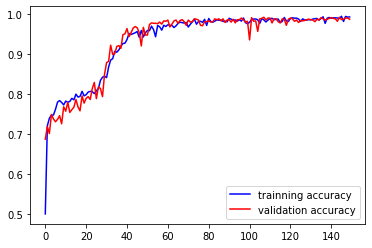

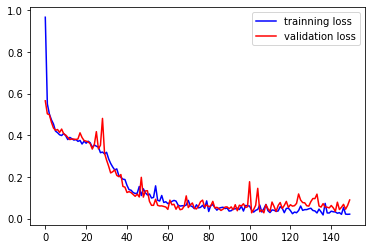

In [ ]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(accuracy))

plt.plot(epochs, accuracy, "b", label="trainning accuracy")
plt.plot(epochs, val_accuracy, "r", label="validation accuracy")
plt.legend()
plt.savefig("accuracy.png")
plt.show()

plt.plot(epochs, loss, "b", label="trainning loss")
plt.plot(epochs, val_loss, "r", label="validation loss")
plt.legend()
plt.savefig("loss.png")
plt.show()

**Kết quả training**

In [ ]:
model.save("drowiness_new6.h5")

In [ ]:
model.save("drowiness_new6.model")

INFO:tensorflow:Assets written to: drowiness_new6.model/assets


In [ ]:
prediction = model.predict_classes(X_test)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [ ]:
prediction

array([3, 3, 3, 2, 2, 1, 1, 0, 0, 3, 3, 1, 2, 1, 1, 3, 0, 1, 3, 2, 2, 2,
       3, 3, 2, 0, 3, 2, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 3, 0, 3, 3, 2,
       1, 2, 2, 0, 3, 0, 3, 1, 2, 3, 3, 3, 3, 3, 2, 2, 3, 1, 0, 3, 0, 0,
       0, 3, 2, 3, 2, 2, 1, 0, 3, 0, 1, 2, 0, 3, 2, 0, 3, 2, 2, 2, 0, 2,
       2, 0, 1, 1, 0, 2, 2, 0, 0, 0, 1, 0, 3, 1, 3, 0, 2, 0, 3, 0, 1, 0,
       1, 2, 0, 2, 0, 1, 2, 0, 2, 2, 1, 0, 0, 2, 0, 0, 3, 0, 1, 0, 1, 1,
       0, 0, 0, 2, 0, 3, 3, 0, 2, 3, 2, 3, 3, 3, 1, 3, 2, 0, 0, 2, 1, 1,
       1, 0, 0, 2, 2, 0, 2, 1, 2, 3, 3, 1, 0, 0, 0, 2, 0, 3, 1, 3, 2, 0,
       3, 3, 2, 0, 0, 2, 1, 3, 1, 3, 0, 1, 0, 2, 0, 1, 3, 0, 1, 0, 3, 2,
       3, 2, 3, 0, 2, 0, 1, 3, 1, 0, 1, 0, 2, 0, 2, 0, 0, 0, 1, 2, 2, 1,
       0, 3, 0, 3, 3, 2, 0, 0, 3, 1, 0, 0, 2, 3, 2, 3, 0, 0, 1, 2, 3, 1,
       0, 3, 0, 0, 1, 0, 2, 3, 1, 2, 3, 2, 1, 0, 0, 3, 3, 0, 3, 2, 3, 0,
       3, 0, 1, 1, 1, 0, 0, 2, 2, 3, 1, 2, 0, 0, 1, 1, 1, 1, 3, 3, 1, 0,
       1, 2, 0, 2, 0, 2, 0, 1, 1, 3, 2, 0, 1, 1, 2,

In [ ]:
labels_new = ["yawn", "no_yawn", "Closed", "Open"]

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(np.argmax(y_test, axis=1), prediction, target_names=labels_new))

              precision    recall  f1-score   support

        yawn       1.00      0.98      0.99       279
     no_yawn       0.97      1.00      0.99       237
      Closed       0.99      0.89      0.93       232
        Open       0.90      0.99      0.94       241

    accuracy                           0.96       989
   macro avg       0.97      0.96      0.96       989
weighted avg       0.97      0.96      0.96       989



In [ ]:
labels_new = ["yawn", "no_yawn", "Closed", "Open"]
IMG_SIZE = 224
def prepare(filepath, face_cas="../input/prediction-images/haarcascade_frontalface_default.xml"):
    img_array = cv2.imread(filepath, cv2.IMREAD_COLOR)
    img_array = img_array / 255
    resized_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
    return resized_array.reshape(-1, IMG_SIZE, IMG_SIZE, 3)

model = tf.keras.models.load_model("./drowiness_new6.h5")

****